<a href="https://colab.research.google.com/github/VKSi/2020_11_GB_TimeSeries/blob/main/HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Временные ряды 5. Поиск аномалий и особенные случаи обработки

## Коинтегральные ряды

## Задание

1. Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями
2. Добавьте первые разности по стоимости доллара и евро к рублю
3. сделайте ее перрасчет (ресемплинг) в представление по неделям. 
4. Постройте модель предсказания 1-й точки от текущей (h=1).

5. Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.

## Ответы

### Задание №1

1. Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 

In [ ]:
data = pd.read_csv('my_BRENT2019.csv', index_col=[0], parse_dates=[0])

Сразу сделаем ресемплинг из Задания 3

In [ ]:
data.rename(columns = {'Значение':'value'}, inplace = True)
data.sort_index(inplace = True)
data = data[['value']]
data = data.asfreq('W', method ='pad')

In [ ]:
data.head()

,value
Дата,
2010-09-05,76.63
2010-09-12,78.36
2010-09-19,78.23
2010-09-26,78.94
2010-10-03,83.69


Text(0.5, 0, 't')

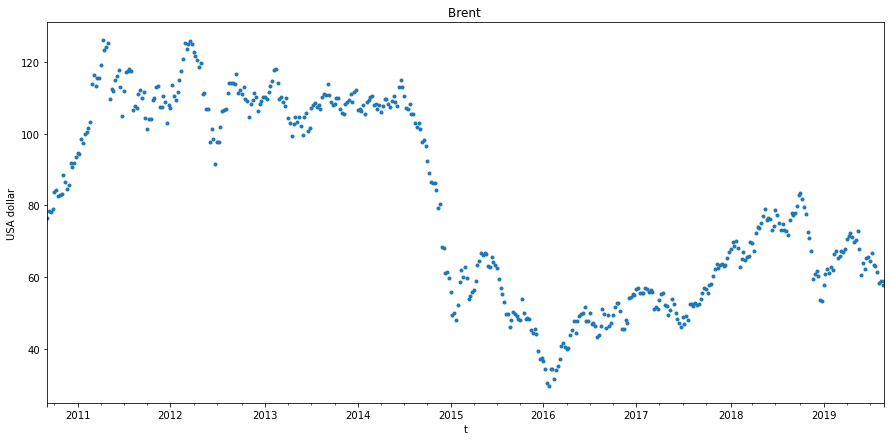

In [ ]:
_ = data.value.plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

Рассчитаем первые разности

In [ ]:
data.loc[data.index[0], 'diff1'] = 0
data.loc[data.index[1:], 'diff1'] = data.loc[data.index[1:], 'value'].values - data.loc[data.index[:-1], 'value'].values

In [ ]:
data.head()

,value,diff1
Дата,,
2010-09-05,76.63,0.00
2010-09-12,78.36,1.73
2010-09-19,78.23,-0.13
2010-09-26,78.94,0.71
2010-10-03,83.69,4.75


In [ ]:
data.tail()

,value,diff1
Дата,,
2019-08-04,61.33,-1.72
2019-08-11,58.27,-3.06
2019-08-18,58.89,0.62
2019-08-25,57.81,-1.08
2019-09-01,58.84,1.03


In [ ]:
data.shape[0]

470

Повторение - мать учения. Вспомним про тест Дики-Фуллера из второго занятия:

In [ ]:
import statsmodels.api as sm

In [ ]:
DF_brent = sm.tsa.stattools.adfuller(data['diff1'].values, regression = 'ctt')
DF_brent

(-21.45022086783883,
 0.0,
 0,
 469,
 {'1%': -4.396004396159916,
  '5%': -3.845040040255731,
  '10%': -3.561087664541695},
 2250.2481469655886)

Ряд интегральный (разница первого порядка стационарна)

### Задание №2

2. Добавьте первые разности по стоимости доллара и евро к рублю

In [ ]:
rub_doll=pd.read_excel('RC_F01_09_2010_T01_09_2019.xlsx')
rub_doll.index = pd.to_datetime(rub_doll['data'].values).date
rub_doll.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_doll.head()

,curs
2010-09-01,30.8669
2010-09-02,30.8001
2010-09-03,30.6858
2010-09-04,30.6922
2010-09-07,30.5771


In [ ]:
rub_doll.sort_index(inplace = True)
rub_doll = rub_doll[['curs']]
rub_doll = rub_doll.asfreq('W', method ='pad')

In [ ]:
rub_doll.loc[rub_doll.index[0], 'diff1'] = 0
rub_doll.loc[rub_doll.index[1:], 'diff1'] = rub_doll.loc[rub_doll.index[1:], 'curs'].values \
                                            - rub_doll.loc[rub_doll.index[:-1], 'curs'].values

In [ ]:
rub_doll.tail()

,curs,diff1
2019-07-28,63.1271,0.2605
2019-08-04,64.6423,1.5152
2019-08-11,65.2543,0.6120
2019-08-18,65.9961,0.7418
2019-08-25,65.6046,-0.3915


In [ ]:
rub_doll.shape[0]

469

В данных по нефти на одну неделю больше

In [ ]:
data = data.iloc[:-1, :]

In [ ]:
data.shape[0]

469

In [ ]:
DF_doll = sm.tsa.stattools.adfuller(rub_doll['diff1'].values, regression = 'ctt')
DF_doll

(-6.853438868852033,
 1.747092630696711e-07,
 5,
 463,
 {'1%': -4.3963289657263935,
  '5%': -3.8452047473422097,
  '10%': -3.5611894351163547},
 1527.4578746845805)

Значение первого элемента ниже, чем критическое для 1%. Второе значение мало. Ряд очень близок к стационарному

In [ ]:
rub_e=pd.read_excel('R_E01_09_2010_T01_09_2019.xlsx')
rub_e.index = pd.to_datetime(rub_e['data'].values).date
rub_e.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_e.tail()

,curs
2019-08-27,73.3955
2019-08-28,73.6091
2019-08-29,73.6583
2019-08-30,73.9558
2019-08-31,73.3847


In [ ]:
rub_e.sort_index(inplace = True)
rub_e = rub_e[['curs']]
rub_e = rub_e.asfreq('W', method ='pad')

In [ ]:
rub_e.loc[rub_e.index[0], 'diff1'] = 0
rub_e.loc[rub_e.index[1:], 'diff1'] = rub_e.loc[rub_e.index[1:], 'curs'].values \
                                            - rub_e.loc[rub_e.index[:-1], 'curs'].values

In [ ]:
rub_e.tail()

,curs,diff1
2019-07-28,70.3110,-0.4831
2019-08-04,71.7077,1.3967
2019-08-11,73.0196,1.3119
2019-08-18,73.2227,0.2031
2019-08-25,72.6243,-0.5984


In [ ]:
rub_e.shape[0]

469

In [ ]:
DF_eur = sm.tsa.stattools.adfuller(rub_e['diff1'].values, regression = 'ctt')
DF_eur

(-9.451985406119741,
 9.401613939816885e-14,
 3,
 465,
 {'1%': -4.396219838735785,
  '5%': -3.845149370443721,
  '10%': -3.5611552188045854},
 1658.3177067297975)

Значение первого элемента ниже, чем критическое для 1%. Второе значение мало. Ряд очень близок к стационарному

In [ ]:
data.loc[:, 'diff1_eur'] = rub_e.loc[:, 'diff1']
data.loc[:, 'diff1_usd'] = rub_doll.loc[:, 'diff1']
# data.drop(['value'], axis='columns', inplace=True)

In [ ]:
data.head()

,value,diff1,diff1_eur,diff1_usd
Дата,,,,
2010-09-05,76.63,0.00,0.0000,0.0000
2010-09-12,78.36,1.73,-0.1588,0.2015
2010-09-19,78.23,-0.13,1.6198,0.1889
2010-09-26,78.94,0.71,0.4484,-0.1346
2010-10-03,83.69,4.75,0.4007,-0.4386


### Задание №3

3. сделайте ее перрасчет (ресемплинг) в представление по неделям.

Сделано при выполнении заданий 1 и 2

### Задание №4

4. Постройте модель предсказания 1-й точки от текущей (h=1).

Добавим признаков (историю)

In [ ]:
df = data.copy()

In [ ]:
p = 52
h = 1
for i in range(p):
    for col in ['value', 'diff1', 'diff1_eur', 'diff1_usd']:
        df[f'{col}_t_{p-i}'] = 0
        df[f'{col}_t_{p-i}'].values[p:] = df[col].values[i: -(p -i)]
        df[f'{col}_t_{p-i}'].fillna(0, inplace=True)

In [ ]:
df.columns

Index(['value', 'diff1', 'diff1_eur', 'diff1_usd', 'value_t_52', 'diff1_t_52',
       'diff1_eur_t_52', 'diff1_usd_t_52', 'value_t_51', 'diff1_t_51',
       ...
       'diff1_eur_t_3', 'diff1_usd_t_3', 'value_t_2', 'diff1_t_2',
       'diff1_eur_t_2', 'diff1_usd_t_2', 'value_t_1', 'diff1_t_1',
       'diff1_eur_t_1', 'diff1_usd_t_1'],
      dtype='object', length=212)

##### Отбираем лучшие признаки

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
TARGET = 'value'

In [ ]:
def X_y_prep(data, h, p):
    scl_target = StandardScaler() 
    scl_x = StandardScaler() 

    target = data[TARGET].values[h + p:].reshape((df.shape[0] - h - p, 1))
    y = scl_target.fit_transform(target)

    X = data.iloc[p : -h, :].values
    X = scl_x.fit_transform(X.astype('float64'))

    assert(y.shape[0] == X.shape[0])
    
    return X, y, scl_target, scl_x

In [ ]:
X, y, scl_target, scl_x = X_y_prep(df.copy(), h=1, p=52)

In [ ]:
y.shape

(416, 1)

In [ ]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import f_regression, mutual_info_regression

In [ ]:
def range_feat(X, y, feat_names):
    f_test, _ = f_regression(X, y.ravel())
    f_test /= np.max(f_test)
    for i in range(X.shape[1]):
        print("F-test={:.2f},  feature={},      \t\t I={}".format(f_test[i], feat_names[i], i))

In [ ]:
range_feat(X, y, df.columns)

F-test=1.00,  feature=value,      		 I=0
F-test=0.00,  feature=diff1,      		 I=1
F-test=0.00,  feature=diff1_eur,      		 I=2
F-test=0.00,  feature=diff1_usd,      		 I=3
F-test=0.01,  feature=value_t_52,      		 I=4
F-test=0.00,  feature=diff1_t_52,      		 I=5
F-test=0.00,  feature=diff1_eur_t_52,      		 I=6
F-test=0.00,  feature=diff1_usd_t_52,      		 I=7
F-test=0.01,  feature=value_t_51,      		 I=8
F-test=0.00,  feature=diff1_t_51,      		 I=9
F-test=0.00,  feature=diff1_eur_t_51,      		 I=10
F-test=0.00,  feature=diff1_usd_t_51,      		 I=11
F-test=0.01,  feature=value_t_50,      		 I=12
F-test=0.00,  feature=diff1_t_50,      		 I=13
F-test=0.00,  feature=diff1_eur_t_50,      		 I=14
F-test=0.00,  feature=diff1_usd_t_50,      		 I=15
F-test=0.01,  feature=value_t_49,      		 I=16
F-test=0.00,  feature=diff1_t_49,      		 I=17
F-test=0.00,  feature=diff1_eur_t_49,      		 I=18
F-test=0.00,  feature=diff1_usd_t_49,      		 I=19
F-test=0.01,  feature=value_t_48,      		 I=20
F-t

In [ ]:
sfk = SelectKBest(f_regression, k=150)
X_new =sfk.fit_transform(X, y.ravel())
X_new.shape

(416, 150)

In [ ]:
column_names = df.columns[sfk.get_support()]
column_names

Index(['value', 'diff1', 'value_t_52', 'diff1_t_52', 'diff1_eur_t_52',
       'diff1_usd_t_52', 'value_t_51', 'diff1_t_51', 'diff1_usd_t_51',
       'value_t_50',
       ...
       'value_t_3', 'diff1_t_3', 'diff1_usd_t_3', 'value_t_2', 'diff1_t_2',
       'diff1_eur_t_2', 'diff1_usd_t_2', 'value_t_1', 'diff1_t_1',
       'diff1_usd_t_1'],
      dtype='object', length=150)

##### Разделение данных на тестовые и тренировочные 

In [ ]:
def split_data(data, split_date):
    return data.loc[data.index.get_level_values('Дата') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Дата') >  split_date].copy()

Назначим датой разделения 1/09/2017

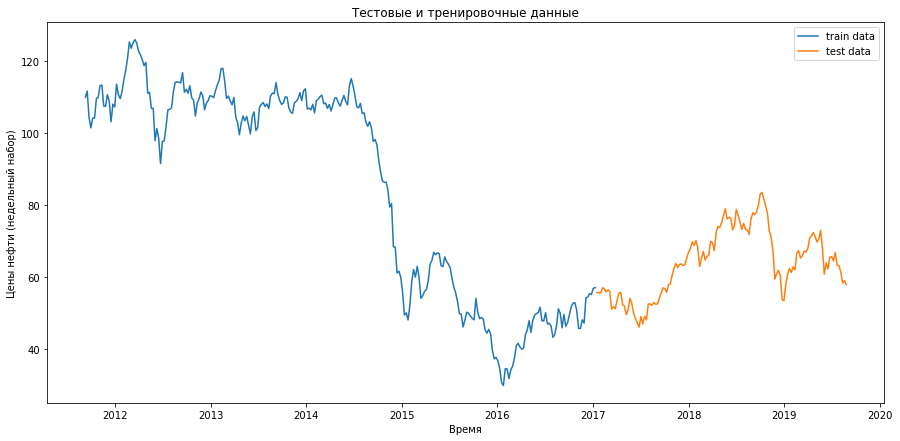

In [ ]:
train, test = split_data(df.iloc[p + h:, :].copy(), '01-09-2017')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Цены нефти (недельный набор)')
plt.plot(train.index.get_level_values('Дата'), train[TARGET], label='train data' )
plt.plot(test.index.get_level_values('Дата'), test[TARGET], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [ ]:
train.shape

(279, 212)

In [ ]:
test.shape

(137, 212)

In [ ]:
train.shape[0]+test.shape[0]

416

In [ ]:
X_new.shape

(416, 150)

In [ ]:
X_train =X_new[:train.shape[0], :]
y_train =y[:train.shape[0], 0]
X_test =X_new[train.shape[0]:, :]
y_test =y[train.shape[0]:, 0]

In [ ]:
X_train.shape

(279, 150)

In [ ]:
X_test.shape

(137, 150)

In [ ]:
X_train.shape[0] + X_test.shape[0]

416

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

Запускаем модели и смотрим , что они построят на наших примерах.

In [ ]:
model_g.fit( X_train, y_train )

GradientBoostingRegressor(max_depth=5, random_state=0)

In [ ]:
y_test_pred_g = model_g.predict(X_test)

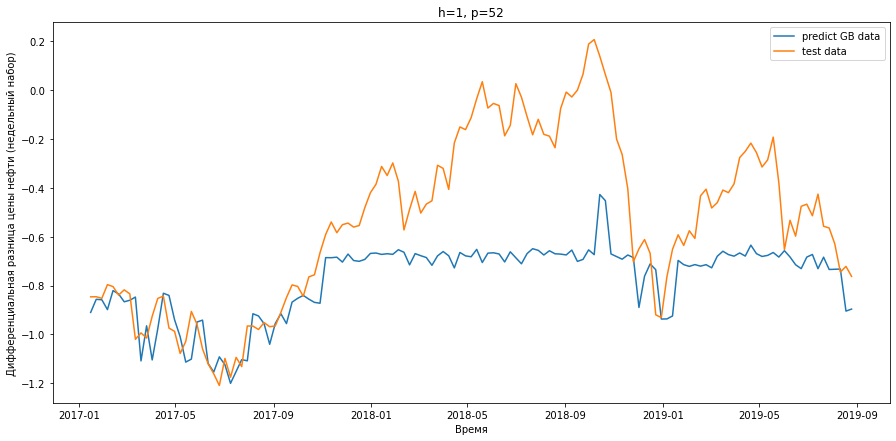

In [ ]:
plt.figure( figsize=( 15, 7 ))

plt.xlabel('Время')
plt.ylabel('Дифференциальная разница цены нефти (недельный набор)')
plt.plot(test.index, y_test_pred_g, label='predict GB data' )
plt.plot(test.index, y_test, label='test data')

plt.legend()
plt.title('h=1, p=52')
plt.show()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform(y_test),
                                      y_pred = scl_target.inverse_transform(y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   9.737159637341078 %


Анализ на отсутствие корреляции с последующим ответом (проверяем не делаем ли предсказание в стиле "завтра==сегодня")

In [ ]:
def corr_lag_plot(y_test, y_test_pred_g, lag=10):
    lag=10
    p_cor=[np.corrcoef(y_test, y_test_pred_g)[1,0]]
    for i in range(lag):
        c=np.corrcoef(y_test[:-(i+1)], y_test_pred_g[(i+1):])[1,0]
        p_cor.append(c)    

    plt.plot(np.array(p_cor) )  
    plt.xlabel('лаг корреляции')
    plt.ylabel('cor_coeff')
    plt.title('корреляция цели и предсказаний с лагом просмотра')
    plt.show()

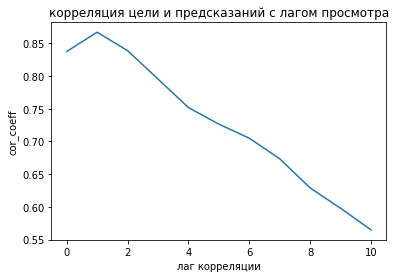

In [ ]:
corr_lag_plot(y_test, y_test_pred_g)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
param_dist = {"max_depth": [3, 2, 10, 14, 5], 
              "n_estimators":[100, 200, 300 ,400, 500, 1000, 1200, 1500]}

#  randomized search
n_iter_search = 10

model_gr = GradientBoostingRegressor()
random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)
random_search.fit(X_train, y_train)
report(random_search.cv_results_)

C:\Users\Me\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Model with rank: 1
Mean validation score: 0.210 (std: 0.340)
Parameters: {'n_estimators': 100, 'max_depth': 3}

Model with rank: 2
Mean validation score: 0.158 (std: 0.336)
Parameters: {'n_estimators': 1200, 'max_depth': 3}

Model with rank: 3
Mean validation score: 0.040 (std: 0.443)
Parameters: {'n_estimators': 500, 'max_depth': 3}



Выбираем модель с рангом 1. {'n_estimators': 100, 'max_depth': 3} (в одном из запусков RandomizedSearchCV был лучший резльтат) и проведем ее обучение на тренировочном наборе.

In [ ]:
model_g_best = GradientBoostingRegressor(max_depth=3,  n_estimators=100)
model_g_best.fit(X_train, y_train) 
y_test_pred_g = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform(y_test),
                                      y_pred = scl_target.inverse_transform(y_test_pred_g))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   11.342890488864809 %


NB! Ошибка до грида была меньше!

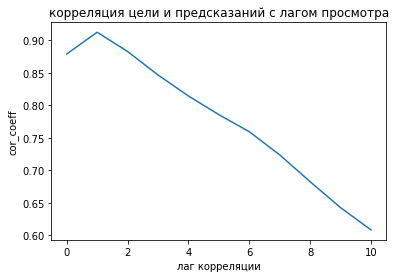

In [ ]:
corr_lag_plot(y_test, y_test_pred_g)

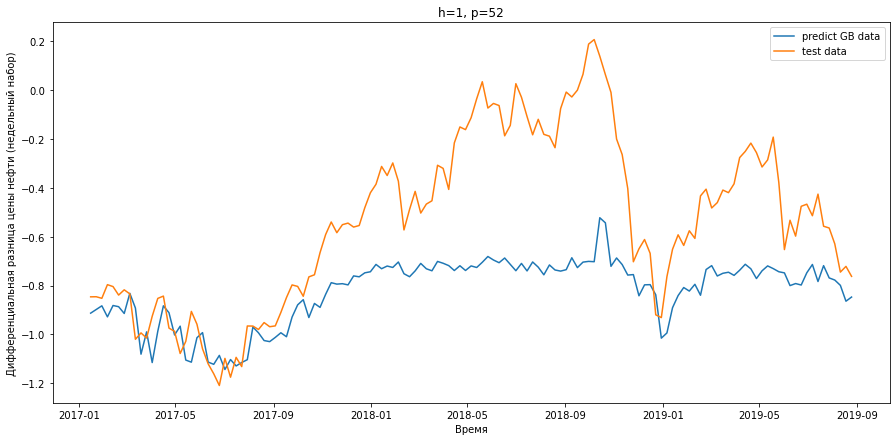

In [ ]:
plt.figure( figsize=( 15, 7 ))

plt.xlabel('Время')
plt.ylabel('Дифференциальная разница цены нефти (недельный набор)')
plt.plot(test.index, y_test_pred_g, label='predict GB data' )
plt.plot(test.index, y_test, label='test data')

plt.legend()
plt.title('h=1, p=52')
plt.show()

### Задание №5

5. Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.

К сожелению, сравнить модели не получится, так как в прошлом задании я "пожадничал" и использовал р=2 и 7 признаков для обучения. (((